In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# FFT Analysis

In [2]:
### Load Data
hs_file_path = r"C:\Users\232078\OneDrive - Weir Group PLC\Documents\India_test_data\Cyclone Lab Data 20260209\HS\RawHS.SYN0901019FC1_Fs4000_T300_20260209T164506.csv"

hs_file = os.path.basename(hs_file_path)
HS_df = pd.read_csv(hs_file_path)

cols = [c for c in HS_df.columns if c.startswith("CY_1_T+")]
if not cols:
    print(f"Skipping {hs_file}: no CY_1_T+ columns found")

# HS_df_conc = HS_df[cols].stack().reset_index(drop=True).to_frame("CY_1")
HS_df_conc = pd.concat([HS_df[c] for c in cols], ignore_index=True).to_frame("CY_1")
print(f"file: {hs_file} - found {len(cols)} CY_1_T+ columns, total {len(HS_df_conc)} rows after stacking")

HS_df_conc #check data head

file: RawHS.SYN0901019FC1_Fs4000_T300_20260209T164506.csv - found 30 CY_1_T+ columns, total 1200000 rows after stacking


,CY_1
0,-0.00610
1,0.40832
2,0.79772
3,1.09741
4,0.00000
...,...
1199995,-0.04119
1199996,-0.04364
1199997,-0.04302
1199998,-0.04180


<Axes: >

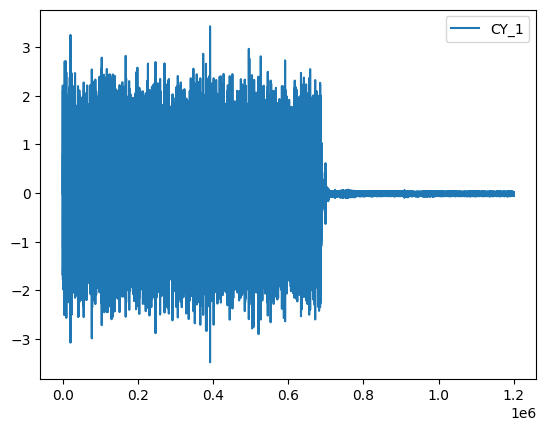

In [3]:
HS_df_conc.plot()

Sampling rate of HS data: 4000
Length of HS data: 1200000
Total time of HS data: 300.0s


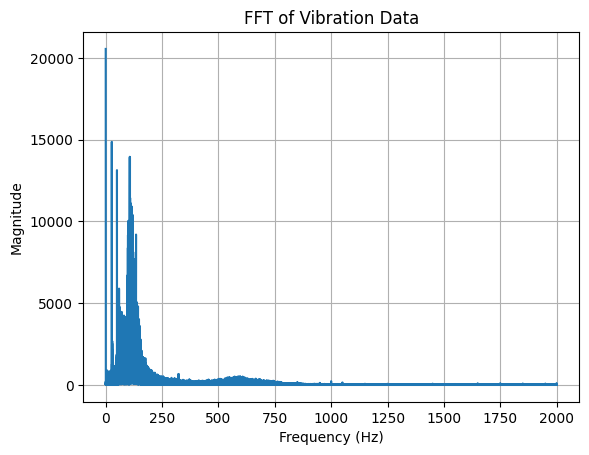

In [57]:
# Parameters
fs = 4000  # sampling rate in Hz
print(f"Sampling rate of HS data: {fs}")

N = len(HS_df_conc)  # should be ~1.2M points
print(f"Length of HS data: {N}")

T_total = N/fs  # total time in seconds
print(f"Total time of HS data: {T_total}s")

HS_FFT = np.fft.fft(HS_df_conc['CY_1'].values)

fft_magnitude = np.abs(HS_FFT)
 

# Create frequency axis
freq = np.fft.fftfreq(N, d=1/fs)
 

# For plotting, usually we only care about positive frequencies
positive_freq_idx = freq >= 0
freq_positive = freq[positive_freq_idx]
fft_magnitude_positive = fft_magnitude[positive_freq_idx]


# plt.plot(freq_positive, fft_magnitude_positive)


# Plot
# plt.figure(figsize=(12, 6))
plt.plot(freq_positive, fft_magnitude_positive)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of Vibration Data')
# plt.xlim(0, fs/2)  # Nyquist frequency
plt.grid(True)
plt.show()

In [ ]:
# Parameters
fs = 4000  # sampling rate in Hz
print(f"Sampling rate of HS data: {fs}")

N = len(HS_df_conc)  # should be ~1.2M points
print(f"Length of HS data: {N}")

T_total = N/fs  # total time in seconds
print(f"Total time of HS data: {T_total}s")

HS_FFT = np.fft.fft(HS_df_conc['CY_1'].values)

fft_magnitude = np.abs(HS_FFT)
 

# Create frequency axis
freq = np.fft.fftfreq(N, d=1/fs)
 

# For plotting, usually we only care about positive frequencies
positive_freq_idx = freq >= 0
freq_positive = freq[positive_freq_idx]
fft_magnitude_positive = fft_magnitude[positive_freq_idx]
plt.plot(freq_positive, fft_magnitude_positive)

Sampling rate of HS data: 4000
Total time of HS data: 300s
Length of HS data: 1200000


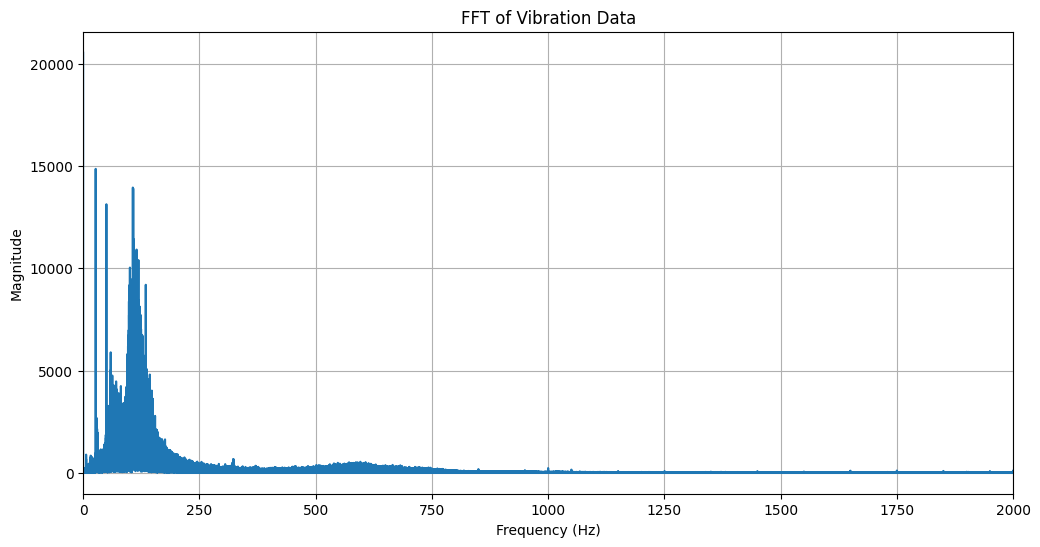

In [ ]:
# Parameters
fs = 4000  # sampling rate in Hz
print(f"Sampling rate of HS data: {fs}")

T_total = 300  # total time in seconds
print(f"Total time of HS data: {T_total}s")

N = len(HS_df_conc)  # should be ~1.2M points
print(f"Length of HS data: {N}")
 

# Extract the vibration data
vibration_data = HS_df_conc['CY_1'].values  # replace 'vibration' with your column name
 

# Compute FFT
fft_values = np.fft.fft(vibration_data)
fft_magnitude = np.abs(fft_values)
 

# Create frequency axis
freq = np.fft.fftfreq(N, d=1/fs)
 

# For plotting, usually we only care about positive frequencies
positive_freq_idx = freq >= 0
freq_positive = freq[positive_freq_idx]
fft_magnitude_positive = fft_magnitude[positive_freq_idx]
 

# Plot
plt.figure(figsize=(12, 6))
plt.plot(freq_positive, fft_magnitude_positive)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of Vibration Data')
plt.xlim(0, fs/2)  # Nyquist frequency
plt.grid(True)
plt.show()
 

# Dataframe with the results
fft_df = pd.DataFrame({

    'frequency_hz': freq_positive,

    'magnitude': fft_magnitude_positive

})
 

Text(0.5, 1.0, 'FFT of 50 Hz Sine Wave')

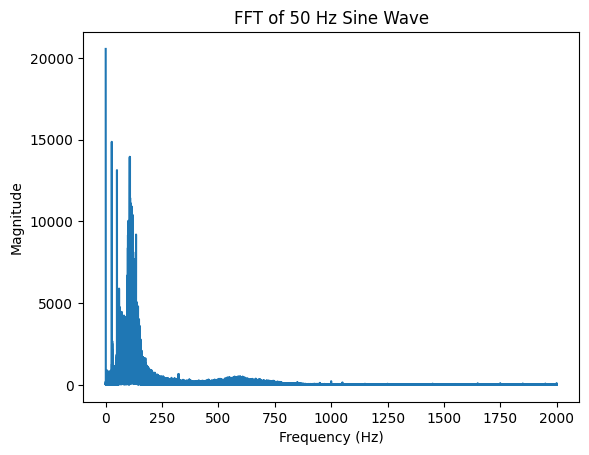

In [23]:
import numpy as np
from scipy.fft import fft, fftfreq

fs = 4000       # sampling rate in Hz
x = HS_df_conc["CY_1"]

Y = fft(x)
freqs = fftfreq(len(x), 1/fs)

fig, ax = plt.subplots()
ax.plot(freqs[:len(freqs)//2], np.abs(Y)[:len(Y)//2])
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Magnitude')
ax.set_title('FFT of 50 Hz Sine Wave')

# Messing around with SciPy

Text(0.5, 1.0, 'FFT of 50 Hz Sine Wave')

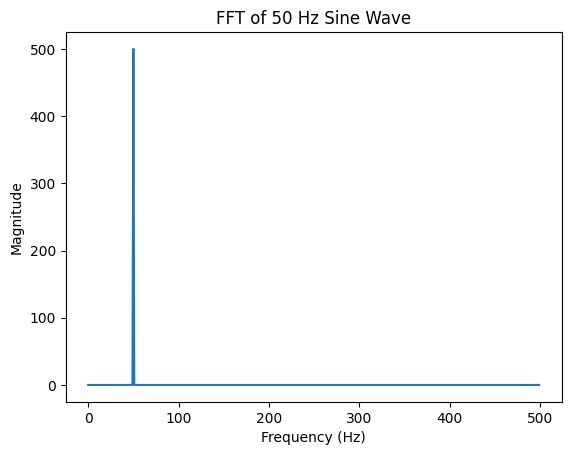

In [7]:
import numpy as np
from scipy.fft import fft, fftfreq

fs = 1000       # sampling rate in Hz
t = np.linspace(0, 1, fs, endpoint=False)
x = np.sin(2*np.pi*50*t)  # 50 Hz sine wave

Y = fft(x)
freqs = fftfreq(len(x), 1/fs)

fig, ax = plt.subplots()
ax.plot(freqs[:len(freqs)//2], np.abs(Y)[:len(Y)//2])
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Magnitude')
ax.set_title('FFT of 50 Hz Sine Wave')